In [12]:
import numpy as np
import pandas as pd

from tools.agency import Agency

#### Load bank data

In [13]:
df = pd.read_csv("data/bank.csv",sep=',')

In [14]:
df.columns = np.append(df.columns[:3],np.arange(15))

In [15]:
df.head()

,Customer,Code_Province,Nom_Province,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1049129,1,ALAVA,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0
1,1049988,1,ALAVA,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0
2,1049457,1,ALAVA,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0
3,1055176,1,ALAVA,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0
4,1052983,1,ALAVA,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0


In [16]:
np.unique(df["Nom_Province"])

array(['ALAVA', 'ALBACETE', 'ALICANTE', 'ALMERIA', 'ASTURIAS', 'AVILA',
       'BADAJOZ', 'BALEARS', 'BARCELONA', 'BIZKAIA', 'BURGOS', 'CACERES',
       'CADIZ', 'CANTABRIA', 'CASTELLON', 'CEUTA', 'CIUDAD REAL',
       'CORDOBA', 'CORUNA', 'CUENCA', 'GIPUZKOA', 'GIRONA', 'GRANADA',
       'GUADALAJARA', 'HUELVA', 'HUESCA', 'JAEN', 'LEON', 'LERIDA', 'LUGO',
       'MADRID', 'MALAGA', 'MELILLA', 'MURCIA', 'NAVARRA', 'OURENSE',
       'PALENCIA', 'PALMAS', 'PONTEVEDRA', 'RIOJA', 'SALAMANCA',
       'SANTA CRUZ DE TENERIFE', 'SEGOVIA', 'SEVILLA', 'SORIA',
       'TARRAGONA', 'TERUEL', 'TOLEDO', 'VALENCIA', 'VALLADOLID', 'ZAMORA',
       'ZARAGOZA'], dtype=object)

#### Transform data

In [17]:
def transform(X, V):
    
    """ Transorm vector of carts into vector of mono-choices & co-susbscription networks """
    
    # carts
    
    carts = [np.nonzero(x)[0] for x in X]
    
    # get mono-product customer choices
    
    y = np.array([cart[0] for cart in carts if len(cart) == 1])
    
    carts = [cart for cart in carts if len(cart) > 1]
    
    # get co-subscription network
    
    A = np.zeros((V,V))
    
    for u in range(V-1):
        for v in range(u+1,V):
            A[u][v] = np.sum([(u in cart) and (v in cart) for cart in carts])
            A[u][v] /= max(np.sum([(u in cart) for cart in carts]) + np.sum([(v in cart) for cart in carts]),1)
    
    A = 1 * (A > 0.1)
    A += A.T
    
    return y,A

In [18]:
agencies = {}

for name in np.unique(df["Nom_Province"]):
    
    # focus on a single province
    
    ind = np.array(df["Nom_Province"] == name)
    
    X = df[ind].values
    X = X[:,3:]
    
    # get mono-product customers choices & co-subscription networks
    
    y, A = transform(X, 15)
    
    # create agency
    
    a = Agency(y,A)
    agencies[name] = a
    

#### Plot agencies

AGENCY
Number V of products: 15
Number of mono-product customers: 268


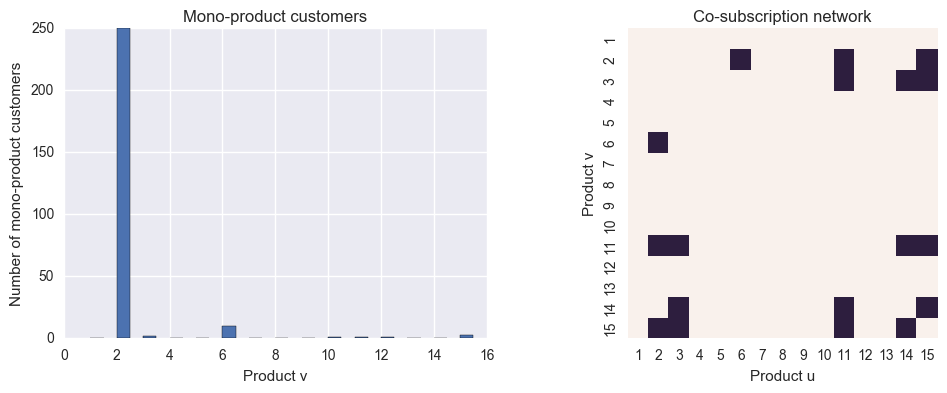

In [19]:
a = agencies["BIZKAIA"]
a.plot()

#### Save dataset

In [20]:
dataset = [agencies[name] for name in np.unique(df["Nom_Province"])]

In [21]:
pd.to_pickle(dataset, "data/data_bank")